**Dataset tomado de:**

https://www.kaggle.com/datasets/shashankshukla123123/marketing-campaign/data

**Definición de variables:**

**ID:**	          Identificador único para cada cliente

**Año_nacimiento:**	Año de nacimiento del cliente.

**Educación:**  Nivel educativo del cliente.

**Estado_civil:**	Estado civil del cliente

**Ingresos:**	Ingresos anuales del cliente.

**Numero_niños:**	Número de niños pequeños en el hogar

**Numero_adolescentes:**	Número de adolescentes en el hogar.

**Fecha_inscripcion:**	Fecha en la que el cliente se inscribió

**Dias_ult_compra:**	Número de días desde la última compra

**Cant_vino:**	Cantidad gastada en vinos en los últimos 2 años

**Cant_fruta:**	Cantidad gastada en frutas en los últimos 2 años

**Cant_carne:**	Cantidad gastada en productos cárnicos en los últimos 2 años

**Cant_pescado:**	Cantidad gastada en productos pesqueros en los últimos 2 años

**Cant_dulces:**	Cantidad gastada en productos dulces en los últimos 2 años

**Cant_oro:**	Cantidad gastada en productos de oro en los últimos 2 años

**Compras_descuento:**	Número de compras realizadas con descuento

**Compras_web:**	Número de compras realizadas a través de la web

**Compras_catalogo:**	Número de compras realizadas mediante catálogo

**Compras_tienda:**	Número de compras realizadas directamente en tiendas

**Visitas_pagWeb:**	Número de visitas al sitio web por mes

In [397]:
import warnings

# Ignorar las advertencias temporariamente
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score

In [398]:
df = pd.read_csv("/content/marketing_campaign.csv", sep='\t')
#df.head()

In [399]:
#Visualización de toda la tabla
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#df

In [400]:
#devuelve el numero de filas y columnas
#print(df.shape)

In [401]:
#Se eliminan las columnas que no se utilizarán
new_df = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1)

#Se cambian los nombres de las columnas para mayor comprensión
new_df = new_df.rename(columns={'Year_Birth':'Anio_nacimiento','Education':'Educacion','Marital_Status':'Estado_civil','Income':'Ingresos','Kidhome':'Numero_ninos',
                                'Teenhome':'Numero_adolescentes','Dt_Customer':'Fecha_inscripcion','Recency':'Dias_ult_compra','MntWines':'Cant_vino','MntFruits':'Cant_fruta',
                                'MntMeatProducts':'Cant_carne','MntFishProducts':'Cant_pescado','MntSweetProducts':'Cant_dulces','MntGoldProds':'Cant_oro','NumDealsPurchases':'Compras_descuento',
                                'NumWebPurchases':'Compras_web','NumCatalogPurchases':'Compras_catalogo','NumStorePurchases':'Compras_tienda','NumWebVisitsMonth':'Visitas_pagWeb'})

new_df.head()

,ID,Anio_nacimiento,Educacion,Estado_civil,Ingresos,Numero_ninos,Numero_adolescentes,Fecha_inscripcion,Dias_ult_compra,Cant_vino,Cant_fruta,Cant_carne,Cant_pescado,Cant_dulces,Cant_oro,Compras_descuento,Compras_web,Compras_catalogo,Compras_tienda,Visitas_pagWeb
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5


In [402]:
#información para hacer limpieza y exploración
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Anio_nacimiento      2240 non-null   int64  
 2   Educacion            2240 non-null   object 
 3   Estado_civil         2240 non-null   object 
 4   Ingresos             2216 non-null   float64
 5   Numero_ninos         2240 non-null   int64  
 6   Numero_adolescentes  2240 non-null   int64  
 7   Fecha_inscripcion    2240 non-null   object 
 8   Dias_ult_compra      2240 non-null   int64  
 9   Cant_vino            2240 non-null   int64  
 10  Cant_fruta           2240 non-null   int64  
 11  Cant_carne           2240 non-null   int64  
 12  Cant_pescado         2240 non-null   int64  
 13  Cant_dulces          2240 non-null   int64  
 14  Cant_oro             2240 non-null   int64  
 15  Compras_descuento    2240 non-null   i

In [403]:
#Pasamos la Columna que guarda la fecha de inscripcion del cliente de dato Object a tipo de dato Fecha
new_df.Fecha_inscripcion = pd.to_datetime(new_df.Fecha_inscripcion, format = '%d-%m-%Y')
new_df['Edad'] = datetime.now().year - new_df['Anio_nacimiento']
#new_df.info()

In [404]:
#Indicamos las estadísticas de las variables numéricas y eliminamos temporalmente la columna ID
new_df.drop('ID', axis=1).describe()

,Anio_nacimiento,Ingresos,Numero_ninos,Numero_adolescentes,Fecha_inscripcion,Dias_ult_compra,Cant_vino,Cant_fruta,Cant_carne,Cant_pescado,Cant_dulces,Cant_oro,Compras_descuento,Compras_web,Compras_catalogo,Compras_tienda,Visitas_pagWeb,Edad
count,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,55.194196
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,47.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,54.000000
75%,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,65.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,131.000000
std,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,11.984069


In [405]:
new_df.describe(include=['object'])

,Educacion,Estado_civil
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [406]:
valores_faltantes = new_df.isnull().sum()
print(valores_faltantes)

ID                      0
Anio_nacimiento         0
Educacion               0
Estado_civil            0
Ingresos               24
Numero_ninos            0
Numero_adolescentes     0
Fecha_inscripcion       0
Dias_ult_compra         0
Cant_vino               0
Cant_fruta              0
Cant_carne              0
Cant_pescado            0
Cant_dulces             0
Cant_oro                0
Compras_descuento       0
Compras_web             0
Compras_catalogo        0
Compras_tienda          0
Visitas_pagWeb          0
Edad                    0
dtype: int64


In [407]:
porcentaje_faltantes = (valores_faltantes/len(new_df)*100)
print(porcentaje_faltantes)

ID                     0.000000
Anio_nacimiento        0.000000
Educacion              0.000000
Estado_civil           0.000000
Ingresos               1.071429
Numero_ninos           0.000000
Numero_adolescentes    0.000000
Fecha_inscripcion      0.000000
Dias_ult_compra        0.000000
Cant_vino              0.000000
Cant_fruta             0.000000
Cant_carne             0.000000
Cant_pescado           0.000000
Cant_dulces            0.000000
Cant_oro               0.000000
Compras_descuento      0.000000
Compras_web            0.000000
Compras_catalogo       0.000000
Compras_tienda         0.000000
Visitas_pagWeb         0.000000
Edad                   0.000000
dtype: float64


In [408]:
#imputamos los null con la media
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
new_df[['Ingresos']] = imp.fit_transform(new_df[['Ingresos']])

#validamos
new_df.isnull().sum()

ID                     0
Anio_nacimiento        0
Educacion              0
Estado_civil           0
Ingresos               0
Numero_ninos           0
Numero_adolescentes    0
Fecha_inscripcion      0
Dias_ult_compra        0
Cant_vino              0
Cant_fruta             0
Cant_carne             0
Cant_pescado           0
Cant_dulces            0
Cant_oro               0
Compras_descuento      0
Compras_web            0
Compras_catalogo       0
Compras_tienda         0
Visitas_pagWeb         0
Edad                   0
dtype: int64

In [409]:
#calculamos la media y la desviación estandar de los valores numericos para identificar valores atípicos y reemplazarlos a null
df_numeric = new_df.select_dtypes(include=[np.number])

#identificamos el z_scores
z_scores = (df_numeric - df_numeric.mean()) / df_numeric.std()
#definicion del umbral para los valoresa atipicos
umbral=3
#identificamos los valores atípicos
outliers = (z_scores.abs()>umbral)
# Reemplazar los valores atípicos con NaN
df_numeric_sin_atipicos = df_numeric.mask(outliers)

In [410]:
# Calculo de la cantidad de valores faltantes por columna
valores_faltantes = df_numeric_sin_atipicos.isnull().sum()
print(valores_faltantes)

ID                      0
Anio_nacimiento         3
Ingresos                8
Numero_ninos            0
Numero_adolescentes     0
Dias_ult_compra         0
Cant_vino              16
Cant_fruta             64
Cant_carne             37
Cant_pescado           58
Cant_dulces            62
Cant_oro               44
Compras_descuento      32
Compras_web             4
Compras_catalogo        4
Compras_tienda          0
Visitas_pagWeb          9
Edad                    3
dtype: int64


In [411]:
# Calculo del porcentaje de valores faltantes por columna
porcentaje_faltantes = (valores_faltantes / len(df_numeric_sin_atipicos)) * 100
print(porcentaje_faltantes)

ID                     0.000000
Anio_nacimiento        0.133929
Ingresos               0.357143
Numero_ninos           0.000000
Numero_adolescentes    0.000000
Dias_ult_compra        0.000000
Cant_vino              0.714286
Cant_fruta             2.857143
Cant_carne             1.651786
Cant_pescado           2.589286
Cant_dulces            2.767857
Cant_oro               1.964286
Compras_descuento      1.428571
Compras_web            0.178571
Compras_catalogo       0.178571
Compras_tienda         0.000000
Visitas_pagWeb         0.401786
Edad                   0.133929
dtype: float64


In [412]:
#imputamos los null que quedaron al eliminar los outliers con la media
# Imputar los valores NaN con la media de cada columna
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_numeric_imputed = pd.DataFrame(imp.fit_transform(df_numeric_sin_atipicos), columns=df_numeric.columns)

# Recombinar con las columnas no numéricas
df_sin_atipicos = new_df.copy()
df_sin_atipicos[df_numeric.columns] = df_numeric_imputed

# Información del DataFrame final
print(df_sin_atipicos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   float64       
 1   Anio_nacimiento      2240 non-null   float64       
 2   Educacion            2240 non-null   object        
 3   Estado_civil         2240 non-null   object        
 4   Ingresos             2240 non-null   float64       
 5   Numero_ninos         2240 non-null   float64       
 6   Numero_adolescentes  2240 non-null   float64       
 7   Fecha_inscripcion    2240 non-null   datetime64[ns]
 8   Dias_ult_compra      2240 non-null   float64       
 9   Cant_vino            2240 non-null   float64       
 10  Cant_fruta           2240 non-null   float64       
 11  Cant_carne           2240 non-null   float64       
 12  Cant_pescado         2240 non-null   float64       
 13  Cant_dulces          2240 non-nul

In [413]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')

#drop_duplicates, elimina las filas duplicadas
df_sin_atipicos.drop_duplicates(inplace = True)

print(f'Tamaño del set despues de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (2240, 29)
Tamaño del set despues de eliminar las filas repetidas: (2240, 29)


In [414]:
#Identificamos las variables categóricas
for i in df_sin_atipicos.columns[df_sin_atipicos.dtypes == 'object']:
  print(f'Total categories in the feature {i}:\n  \n',df_sin_atipicos[i].value_counts())

Total categories in the feature Educacion:
  
 Educacion
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Total categories in the feature Estado_civil:
  
 Estado_civil
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


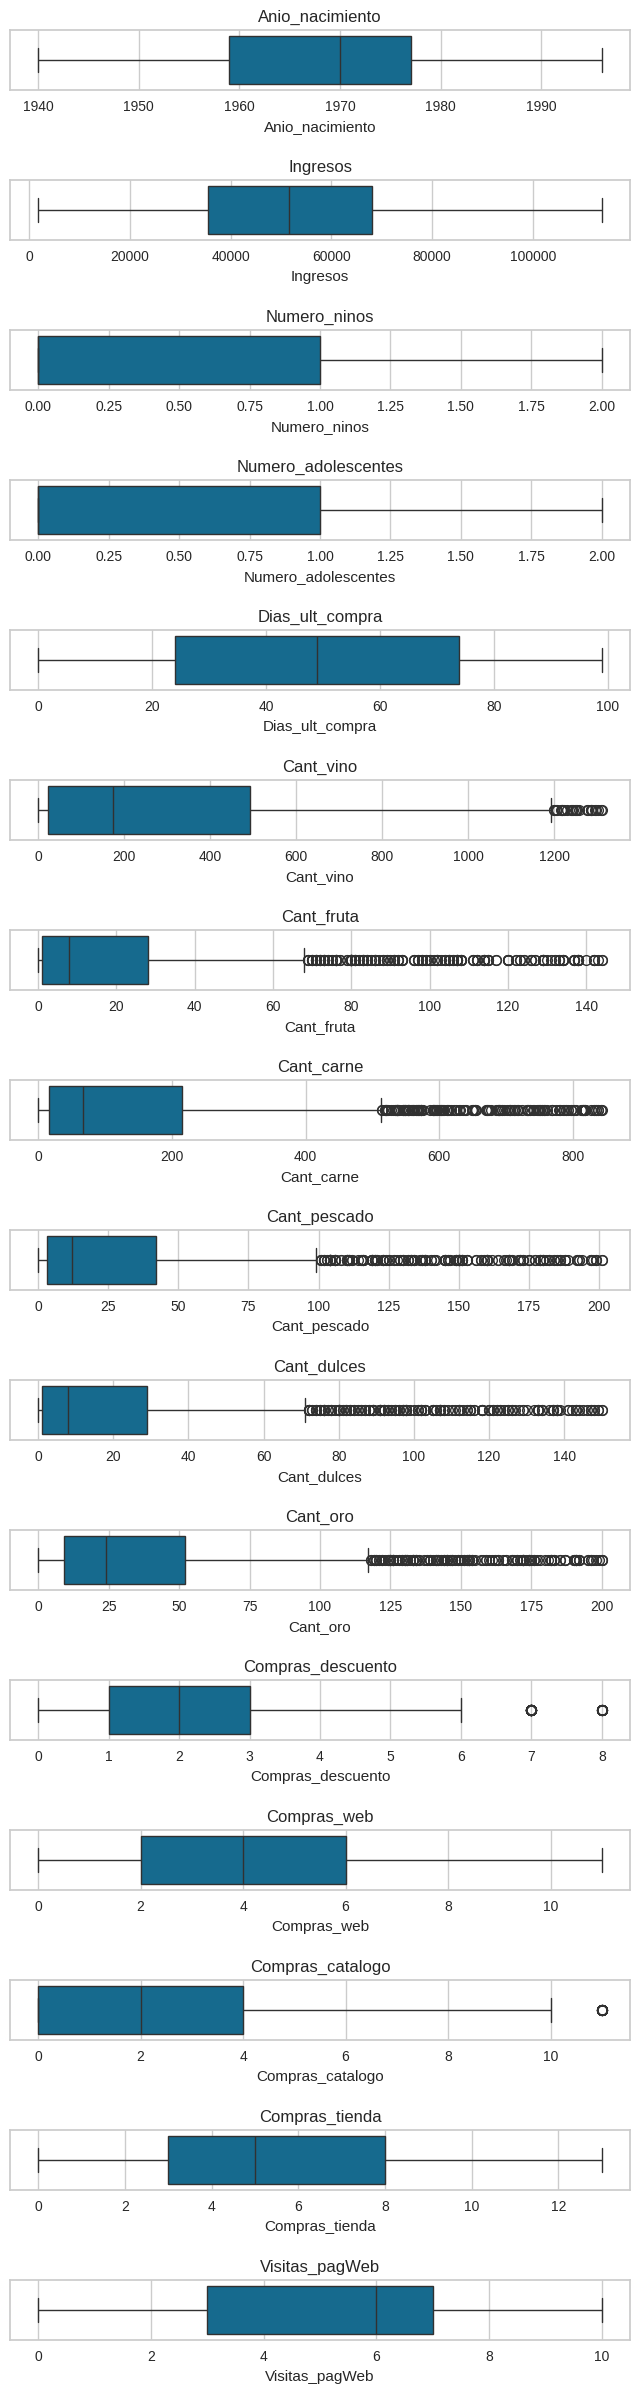

In [415]:
columnas_numericas = ['Anio_nacimiento', 'Ingresos', 'Numero_ninos', 'Numero_adolescentes', 'Dias_ult_compra', 'Cant_vino', 'Cant_fruta', 'Cant_carne', 'Cant_pescado',
            'Cant_dulces', 'Cant_oro', 'Compras_descuento', 'Compras_web', 'Compras_catalogo', 'Compras_tienda', 'Visitas_pagWeb']

fig, ax = plt.subplots(nrows=16, ncols=1, figsize=(8,30))

fig.subplots_adjust(hspace=1.5)

for i, column in enumerate(columnas_numericas):
  sns.boxplot(x=column, data=df_sin_atipicos, ax=ax[i])
  ax[i].set_title(column)

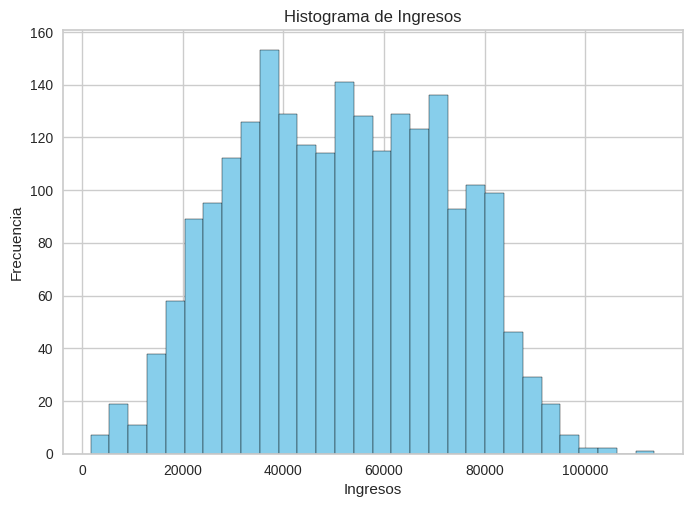

In [416]:
ingresos = df_sin_atipicos['Ingresos']

# Crear el histograma
plt.hist(ingresos, bins=30, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Ingresos')

# Mostrar el histograma
plt.show()

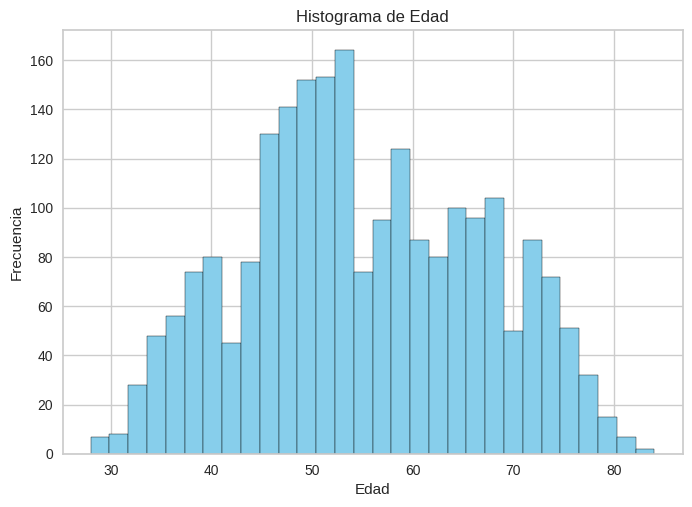

In [417]:
edad = df_sin_atipicos['Edad']
plt.hist(edad,bins=30,color='skyblue',edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')
plt.show()

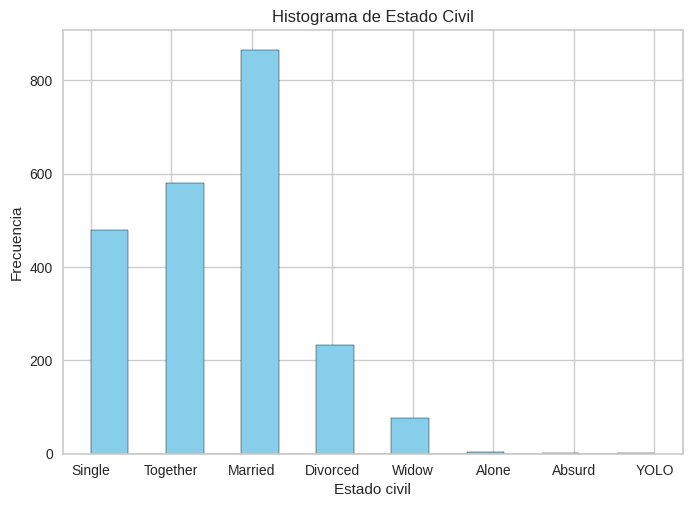

In [418]:
estado_civil = df_sin_atipicos['Estado_civil']
plt.hist(estado_civil,bins=15,color='skyblue',edgecolor='black')
plt.xlabel('Estado civil')
plt.ylabel('Frecuencia')
plt.title('Histograma de Estado Civil')
plt.show()

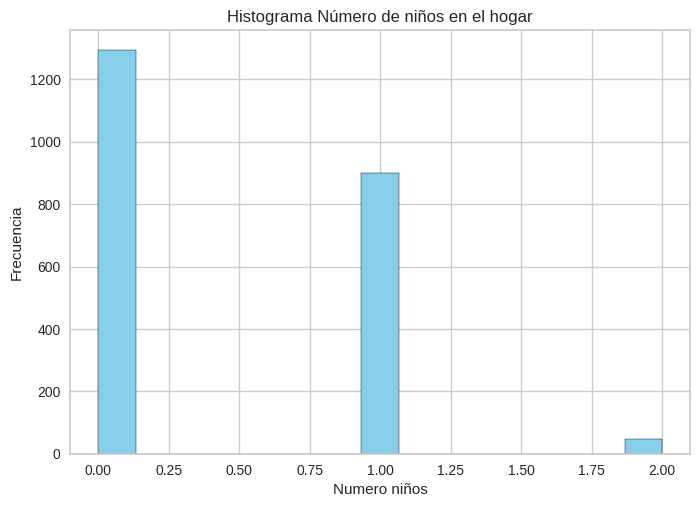

In [419]:
numero_ninos = df_sin_atipicos['Numero_ninos']
plt.hist(numero_ninos,bins=15,color='skyblue',edgecolor='black')
plt.xlabel('Numero niños')
plt.ylabel('Frecuencia')
plt.title('Histograma Número de niños en el hogar')
plt.show()

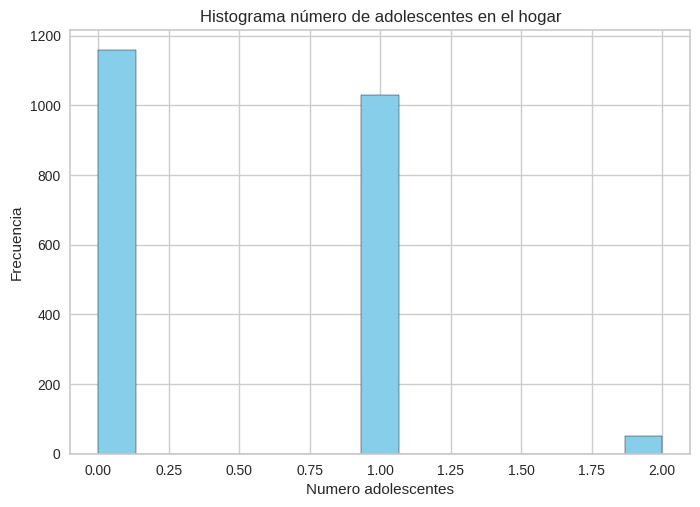

In [420]:
numero_adolescentes = df_sin_atipicos['Numero_adolescentes']
plt.hist(numero_adolescentes,bins=15,color='skyblue',edgecolor='black')
plt.xlabel('Numero adolescentes')
plt.ylabel('Frecuencia')
plt.title('Histograma número de adolescentes en el hogar')
plt.show()

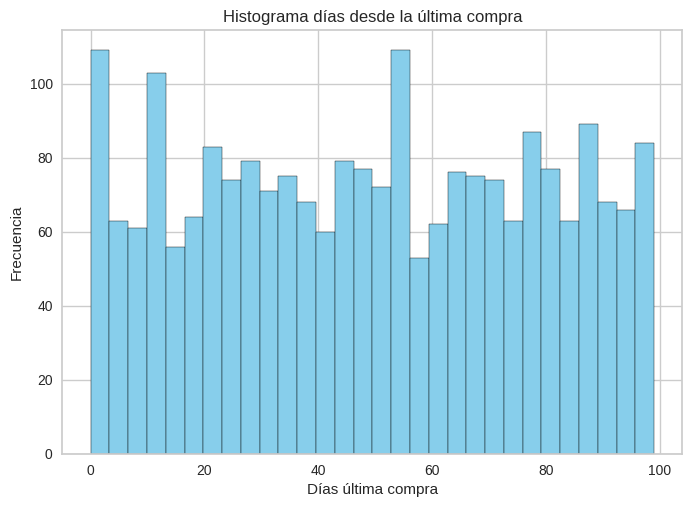

In [421]:
dias_ult_compra = df_sin_atipicos['Dias_ult_compra']
plt.hist(dias_ult_compra,bins=30,color='skyblue',edgecolor='black')
plt.xlabel('Días última compra')
plt.ylabel('Frecuencia')
plt.title('Histograma días desde la última compra')
plt.show()

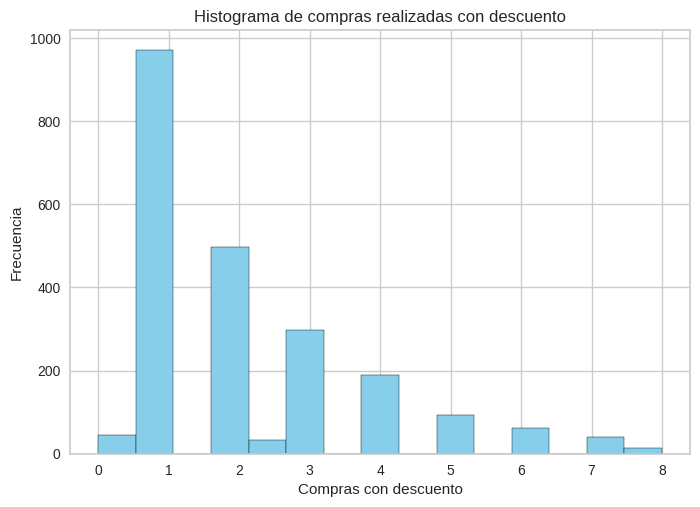

In [422]:
compras_descuento = df_sin_atipicos['Compras_descuento']
plt.hist(compras_descuento,bins=15,color='skyblue',edgecolor='black')
plt.xlabel('Compras con descuento')
plt.ylabel('Frecuencia')
plt.title('Histograma de compras realizadas con descuento')
plt.show()

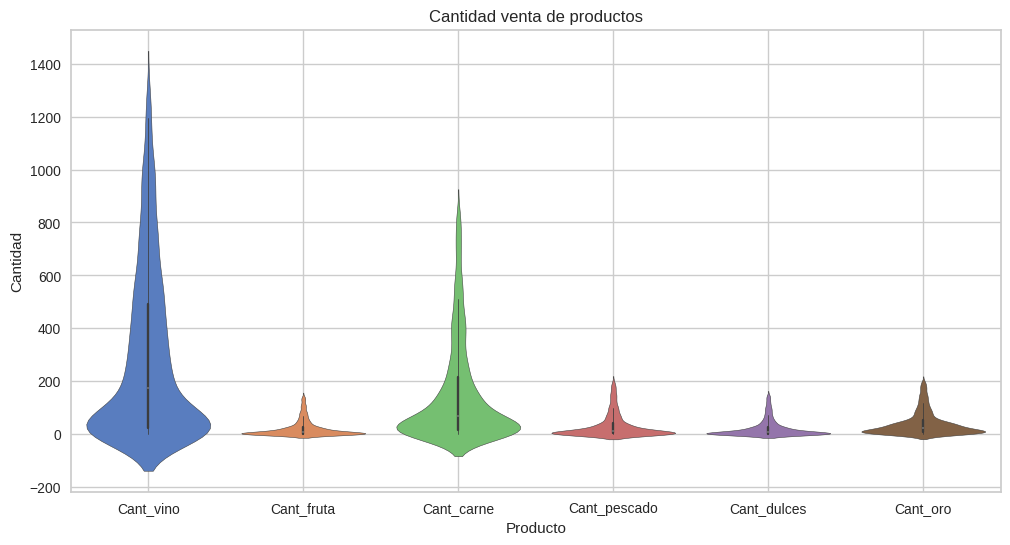

In [423]:
# Seleccionar las columnas de interés
var_selec = df_sin_atipicos[['Cant_vino', 'Cant_fruta', 'Cant_carne', 'Cant_pescado', 'Cant_dulces', 'Cant_oro']]
# Convertir el DataFrame al formato largo
df_long = pd.melt(var_selec, var_name='Producto', value_name='Cantidad')
# Crear el diagrama de violín
plt.figure(figsize=(12,6))
sns.violinplot(x='Producto', y='Cantidad', hue='Producto', data=df_long, palette='muted')
# Añadir título y etiquetas
plt.title('Cantidad venta de productos')
plt.xlabel('Producto')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

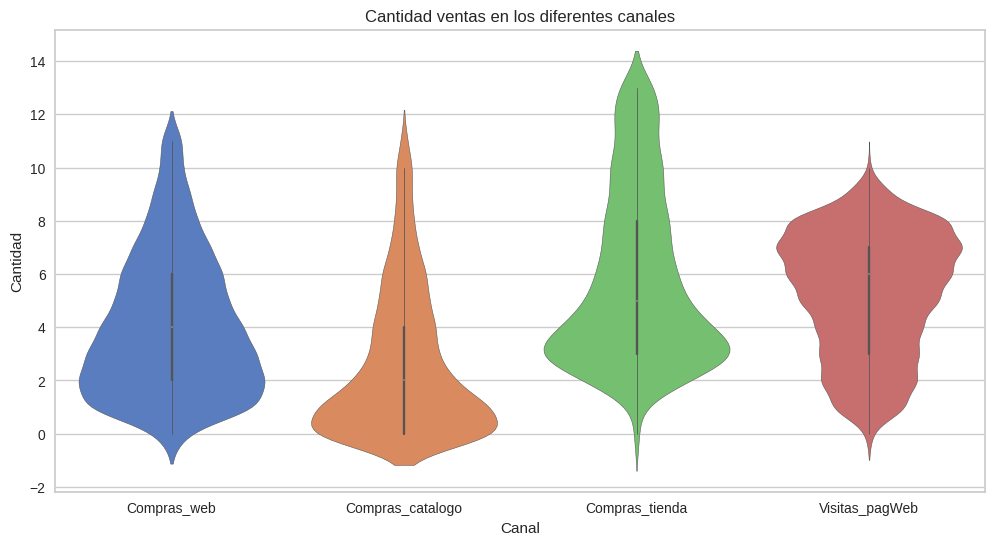

In [424]:
var_selec = df_sin_atipicos[['Compras_web',	'Compras_catalogo',	'Compras_tienda', 'Visitas_pagWeb']]
df_long = pd.melt(var_selec, var_name='Canal', value_name='Cantidad')

plt.figure(figsize=(12,6))
sns.violinplot(x='Canal', y='Cantidad', hue='Canal', data=df_long, palette='muted')

plt.title('Cantidad ventas en los diferentes canales')
plt.xlabel('Canal')
plt.ylabel('Cantidad')
plt.show()

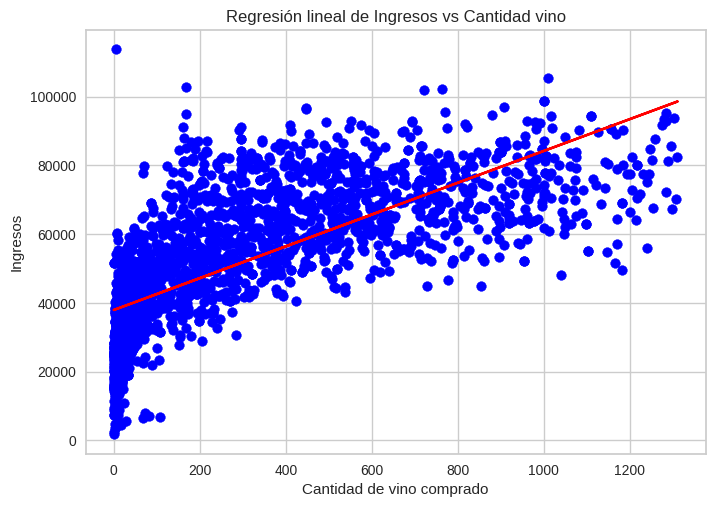

In [425]:
X = df_sin_atipicos['Cant_vino'].values.reshape(-1,1)  # Variable independiente
y = df_sin_atipicos['Ingresos'].values.reshape(-1,1)    # Variable dependiente (Ingresos)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title('Regresión lineal de Ingresos vs Cantidad vino')
plt.xlabel('Cantidad de vino comprado')
plt.ylabel('Ingresos')
plt.show()

**Label Encoding**

In [426]:
#from sklearn.preprocessing import LabelEncoder

#Copia df original
df_estandarizado = df_sin_atipicos.copy()
#Inicializar el LabelEncoder
le = LabelEncoder()
#Aplicamos Label Encoding a ambas columnas
df_estandarizado['Educacion']=le.fit_transform(df_estandarizado['Educacion'])
df_estandarizado['Estado_civil']=le.fit_transform(df_estandarizado['Estado_civil'])

df_estandarizado.head()

,ID,Anio_nacimiento,Educacion,Estado_civil,Ingresos,Numero_ninos,Numero_adolescentes,Fecha_inscripcion,Dias_ult_compra,Cant_vino,Cant_fruta,Cant_carne,Cant_pescado,Cant_dulces,Cant_oro,Compras_descuento,Compras_web,Compras_catalogo,Compras_tienda,Visitas_pagWeb,Edad
0,5524.0,1957.0,2,4,58138.0,0.0,0.0,2012-09-04,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,67.0
1,2174.0,1954.0,2,4,46344.0,1.0,1.0,2014-03-08,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,70.0
2,4141.0,1965.0,2,5,71613.0,0.0,0.0,2013-08-21,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,59.0
3,6182.0,1984.0,2,5,26646.0,1.0,0.0,2014-02-10,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,40.0
4,5324.0,1981.0,4,3,58293.0,1.0,0.0,2014-01-19,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,43.0


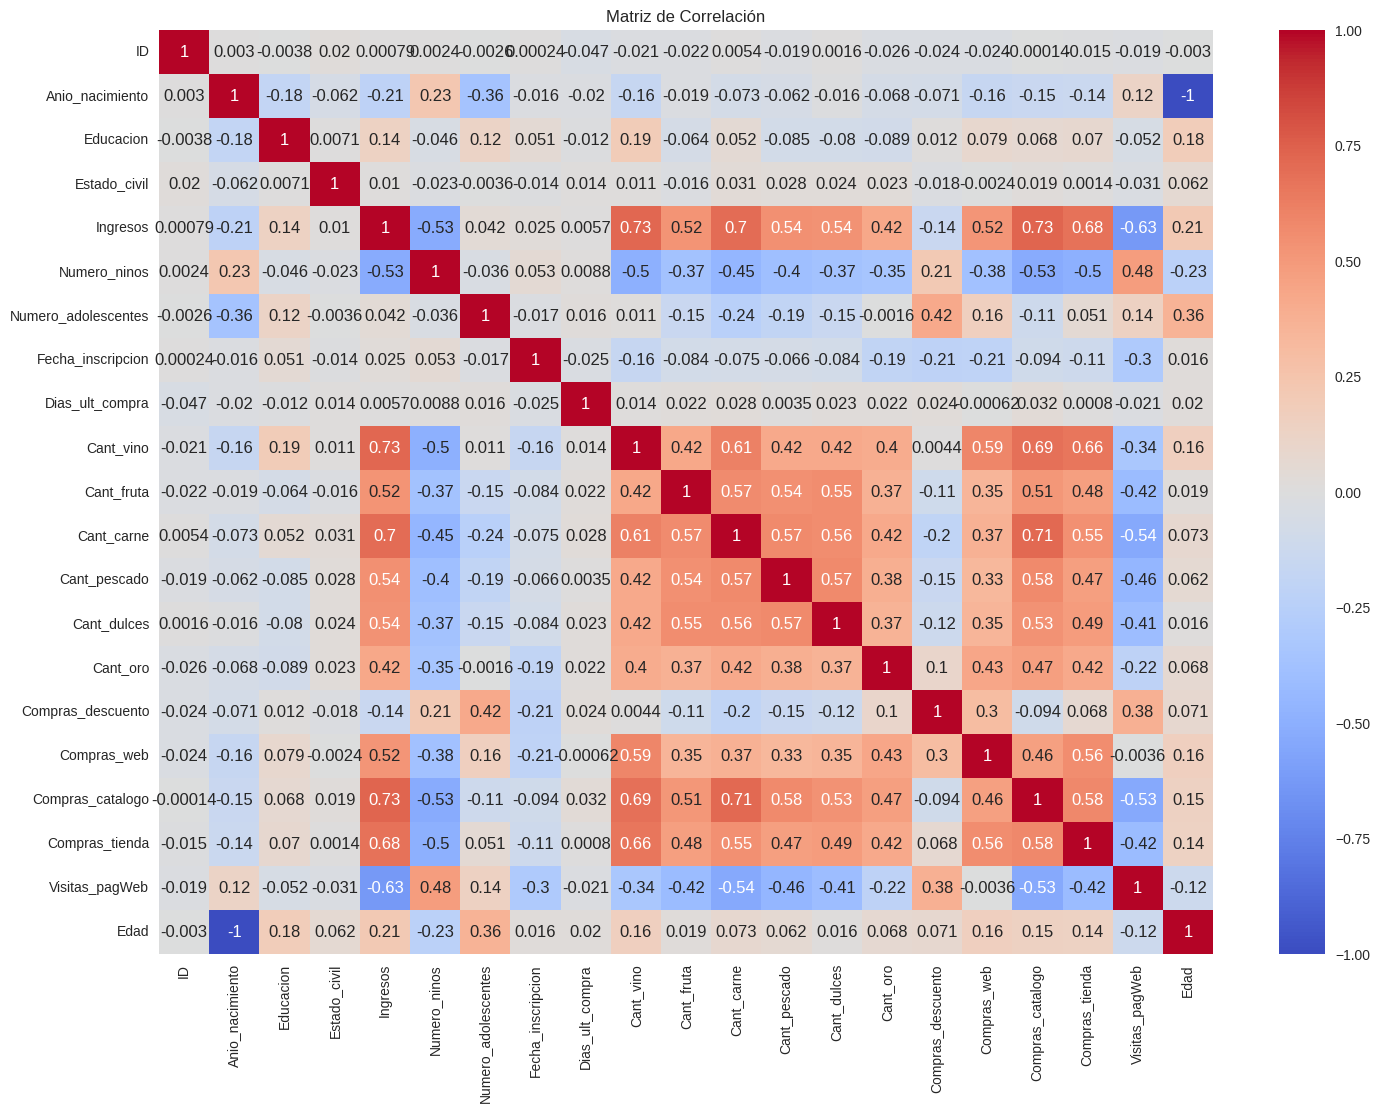

In [427]:
#Calculo matriz de correlación
correlation_matrix = df_estandarizado.corr()

#Visualización matriz de correlación
plt.figure(figsize=(17,12)) #ancho,alto
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [428]:
# Excluimos la columna fechas
df_col_numeric = df_estandarizado.select_dtypes(include=['float64', 'int64'])

#Scaling and Standardizing
X = StandardScaler().fit_transform(df_col_numeric)

In [429]:
from sklearn.preprocessing import PowerTransformer
X = PowerTransformer(standardize=False).fit_transform(X)

In [430]:
X = pd.DataFrame(X, columns=df_col_numeric.columns)
# sanity check
X.head()

,ID,Anio_nacimiento,Educacion,Estado_civil,Ingresos,Numero_ninos,Numero_adolescentes,Dias_ult_compra,Cant_vino,Cant_fruta,Cant_carne,Cant_pescado,Cant_dulces,Cant_oro,Compras_descuento,Compras_web,Compras_catalogo,Compras_tienda,Visitas_pagWeb,Edad
0,-0.021008,-0.983917,-0.344486,0.246582,0.315545,-1.112667,-1.091503,0.307170,0.698611,0.749455,0.806777,0.861149,0.726250,0.637742,0.414294,1.142249,1.312560,-0.647402,0.834519,0.983917
1,-1.071403,-1.223987,-0.344486,0.246582,-0.257926,0.743053,0.780066,-0.383464,-1.310013,-1.150977,-1.276541,-1.148693,-1.143772,-1.211510,-0.130629,-1.478351,-0.763926,-1.579408,-0.114620,1.223987
2,-0.450845,-0.329362,-0.344486,1.103949,0.967473,-1.112667,-1.091503,-0.797304,0.334304,0.490380,-0.146768,0.701777,-0.059828,0.039023,-1.068759,1.142249,-0.251334,0.955264,-0.511903,0.329362
3,0.181050,1.345885,-0.344486,1.103949,-1.221577,0.743053,-1.091503,-0.797304,-1.310013,-0.922335,-1.104885,-0.746937,-0.994370,-1.261230,-0.130629,-0.928598,-1.408241,-0.647402,0.334207,-1.345885
4,-0.082756,1.071432,1.506079,-0.708417,0.323061,0.743053,-1.091503,1.552859,-0.459417,0.420628,-0.205137,0.236775,0.113628,-0.802322,1.010217,0.332896,0.130089,0.063205,-0.114620,-1.071432


In [431]:
import random
fixed_random_state = random.seed(42)

pca_2 = PCA(n_components=10, random_state=fixed_random_state).fit(X)

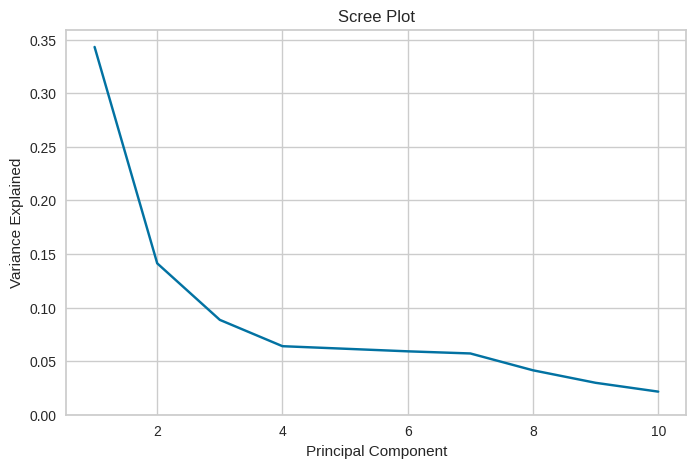

In [432]:
std_figure_size = (8,5)

princ_comps_2 = np.arange(pca_2.n_components_, dtype=int) + 1

fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=princ_comps_2, y=pca_2.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(bottom=0)
plt.show()

In [433]:
X_red_2 = PCA(n_components=4, random_state=fixed_random_state).fit_transform(X)

In [434]:
X_red_2 = pd.DataFrame(X_red_2, columns=["pc1", "pc2", "pc3", "pc4"])

X_red_2.head()

,pc1,pc2,pc3,pc4
0,2.890648,-0.326150,-0.688221,0.864033
1,-2.212484,-2.041442,1.152877,0.757101
2,2.594507,0.536554,0.473924,0.114750
3,-2.842437,1.645117,-0.022829,-0.465660
4,0.453740,1.295999,-1.163995,0.223205


In [435]:
#Identifying the "optimal" number of clusters

inertias_2 = []
range_clusters_2 = np.arange(2, 10, dtype=int)

for n in range_clusters_2:
    kmeans_2 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X_red_2)
    inertias_2.append(kmeans_2.inertia_)

# inertias_2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

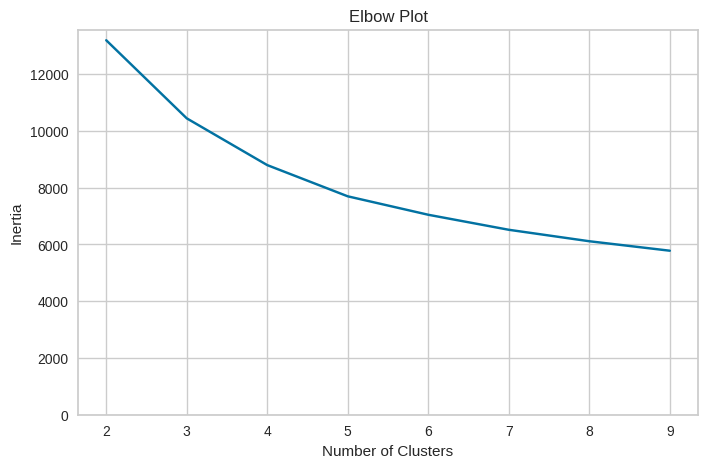

In [436]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_2, y=inertias_2)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.show()

In [437]:
labels_2 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(X_red_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [438]:
!pip install umap-learn
import umap

reducer_2 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_2 = reducer_2.fit_transform(X_red_2)

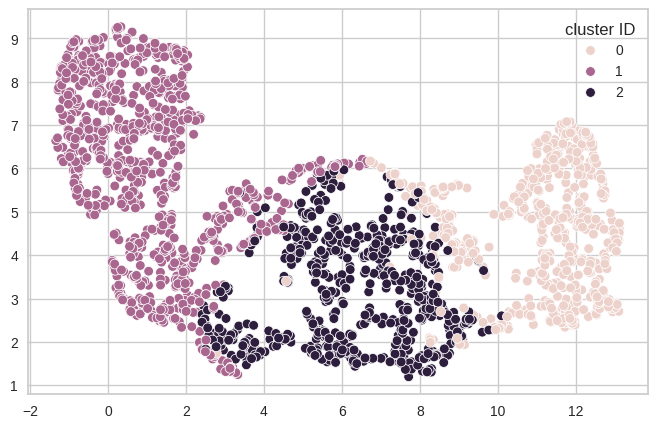

In [439]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=labels_2)
plt.legend(title="cluster ID")
plt.show()